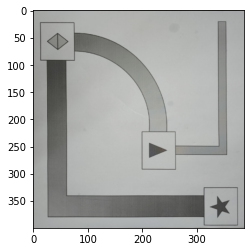

In [42]:
import cv2
import numpy as np
import math
import imutils
from matplotlib import pyplot as plt
def imshow(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
def cartesian_distance(x, y): return math.sqrt(x**2+y**2)

# frame = cv2.imread("Picture1.png")
frame = cv2.imread("Picture5.jpg")
frame = imutils.resize(frame, height=400)
imshow(frame)

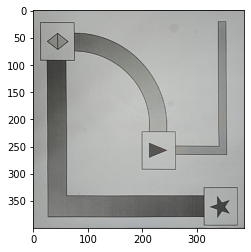

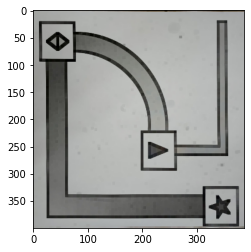

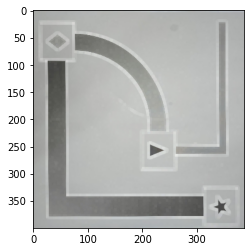

In [43]:
blur = cv2.GaussianBlur(frame, (5, 5), 0)
unsharp = cv2.addWeighted(frame, 2, blur, -1, 0, frame)
imshow(unsharp)
cv2.imwrite("unsharp.jpg", unsharp)
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
LUV = cv2.cvtColor(frame, cv2.COLOR_BGR2LUV)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(frame,kernel,iterations = 1)
dilation = cv2.dilate(frame,kernel,iterations = 1)
imshow(erosion)
imshow(dilation)


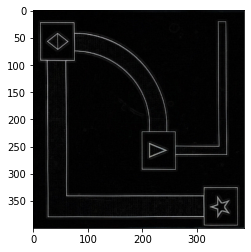

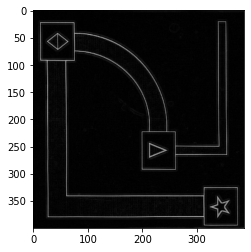

In [44]:
diff = cv2.absdiff(dilation, frame)
imshow(diff)
diff = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
imshow(diff)
# cv2.imwrite("diff.jpg", diff)

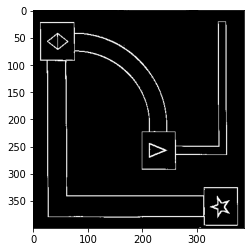

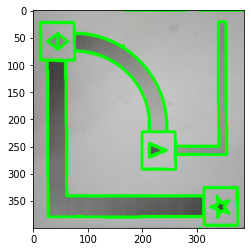

In [45]:
ret, thresh = cv2.threshold(diff, 50, 255, 0)
imshow(thresh)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
imshow(cv2.drawContours(frame, contours, -1, (0,255,0), 3))